# HW4: Paraphrase Identification

## HW4 Delivery policies
|Rules | Punishment (If you do not follow the rule) | Note |
|-|-|-|
| Name the folder as `FDA_HW4_F12345678` and zip it | -5| |
| Include `requirements.txt` in the folder | -5 | |
| Use HuggingFace `dataset` and `trainer` for HW4 | -5 | |
| Results can be reproduced | -10 | We will run your code! |
| Include the best model checkpoint in your zipped folder | -10 |  |
| Note the approximate running time | -5 |  |
| Note the GPU card(s) you use | -5 |  |
| Do not use ChatGPT to predict the answers directly | -20 | You can use ChatGPT to help coding work. |
| Do not use models not from HuggingFace | -20 |  |
| Do not copy and paste the code from your classmates | -20 | You should finish your own work. |

## HW4 Scoring rules
|Rules | Scores|
|-|-|
| Finish the six `# TODO`s (each for +10)  | +60  |
| Introduce the model or methods you use in Markdown | +20 |
| Accuracy on the Test set >= 0.8 | +20 |
| Accuracy on the Test set >= 0.85 | +10 |

* Note: Accuracy on the Test set **needs to be shown in the input of the final cell.** Please DO NOT MODIFY the final cell.


## Submitted Folder Structure Example
- After unzipping, your folder should look like this (in this example, student_id is F12345678)
- `best.ckpt` is your best model checkpoint. TAs will run your code using this checkpoint.
- If you use any other extra files, please include it in the folder.
```
.
└── FDA_HW4_F12345678/
    ├── FDA2023_HW4_ans.ipynb
    ├── requirements.txt
    └── best.ckpt
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!gdown 1yi_dMWy45eCK3ZTK5Opzr1uCXYauXLp3

Downloading...
From: https://drive.google.com/uc?id=1yi_dMWy45eCK3ZTK5Opzr1uCXYauXLp3
To: /content/requirements.txt
100% 103/103 [00:00<00:00, 721kB/s]


In [ ]:
! pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from pathlib import Path
from datetime import datetime
import json
import pandas as pd
import numpy as np
import jieba
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

##### HuggingFace libraries #####
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding
)
##### HuggingFace libraries #####

In [ ]:
# Uncomment the following lines to download the dataset

!wget https://storage.googleapis.com/paws/pawsx/x-final.tar.gz
!tar zxvf x-final.tar.gz

--2023-06-11 03:44:44--  https://storage.googleapis.com/paws/pawsx/x-final.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.234.128, 142.251.171.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.234.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30282057 (29M) [application/gzip]
Saving to: ‘x-final.tar.gz’

x-final.tar.gz      100%[===================>]  28.88M  86.6MB/s    in 0.3s    

2023-06-11 03:44:45 (86.6 MB/s) - ‘x-final.tar.gz’ saved [30282057/30282057]

x-final/fr/translated_train.tsv
x-final/de/
x-final/ko/test_2k.tsv
x-final/
x-final/de/translated_train.tsv
x-final/es/dev_2k.tsv
x-final/es/
x-final/es/translated_train.tsv
x-final/ko/
x-final/fr/test_2k.tsv
x-final/ko/dev_2k.tsv
x-final/fr/dev_2k.tsv
x-final/ja/dev_2k.tsv
x-final/ja/test_2k.tsv
x-final/fr/
x-final/zh/
x-final/es/test_2k.tsv
x-final/en/test_2k.tsv
x-final/en/
x-final/ja/
x-final/ja/translated_train.tsv
x-fina

In [ ]:
data_dir = Path("x-final/zh")
data_files = list(data_dir.glob("*.tsv"))
data_dict = {}

for split in ["train", "dev", "test"]:
    print(split)
    for filename in data_files:
        if split in str(filename):
            print(f"{split}: {filename}")
            df = pd.read_csv(filename, sep="\t")
            df_without_nan = df.dropna()
            data_dict[split] = df_without_nan
            break

train
train: x-final/zh/translated_train.tsv
dev
dev: x-final/zh/dev_2k.tsv
test
test: x-final/zh/test_2k.tsv


## Explore the mean length of sentences in the dataset
### # TODO1: Plot and show the following figure
- Hint: Get the length of each sentence with jieba first.

<div>
<img src='https://drive.google.com/uc?export=view&id=1FjkMnxHuW8FFAhzh6Xlpzqf_b-6_33Bj' width="900"/>
</div>

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.747 seconds.
DEBUG:jieba:Loading model cost 0.747 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


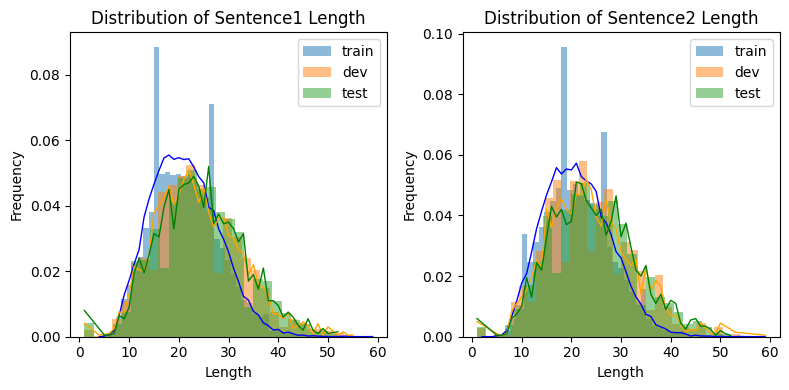

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

def get_sentence_length(sentence: str) -> int:
    tokens = jieba.lcut(sentence)
    return len(tokens)

def get_sentence_distribution(dataset_name, num):
    df = data_dict[dataset_name]
    lengths = []
    sentences = df[num].tolist()
    for sentence in sentences:
      lengths.append(get_sentence_length(sentence))

    length_counts = {}
    for length in lengths:
      if length in length_counts:
        length_counts[length] += 1
      else:
        length_counts[length] = 1

    x = sorted(length_counts.keys())
    y = [length_counts[key] for key in x]

    total_count = sum(y)
    frequencies = [count / total_count for count in y]

    return x, frequencies, lengths

xtrain1, ytrain1 , length_train1 = get_sentence_distribution('train', 'sentence1')
xtrain2, ytrain2 , length_train2 = get_sentence_distribution('train', 'sentence2')
xdev1, ydev1, length_dev1 = get_sentence_distribution('dev', 'sentence1')
xdev2, ydev2, length_dev2 = get_sentence_distribution('dev', 'sentence2')
xtest1, ytest1, length_test1 = get_sentence_distribution('test', 'sentence1')
xtest2, ytest2, length_test2 = get_sentence_distribution('test', 'sentence2')

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of Sentence1 Length')
plt.hist(length_train1, bins=50 ,density=True, alpha=0.5, label='train')
plt.hist(length_dev1, bins='auto' ,density=True, alpha=0.5, label='dev')
plt.hist(length_test1, bins='auto' ,density=True, alpha=0.5, label='test')
plt.plot(xtrain1, ytrain1, color='blue', linewidth=1)
plt.plot(xdev1, ydev1, color='orange', linewidth=1)
plt.plot(xtest1, ytest1, color='green', linewidth=1)

plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Distribution of Sentence2 Length')
plt.hist(length_train2, bins=50 ,density=True, alpha=0.5, label='train')
plt.hist(length_dev2, bins='auto' ,density=True, alpha=0.5, label='dev')
plt.hist(length_test2, bins='auto' ,density=True, alpha=0.5, label='test')
plt.plot(xtrain2, ytrain2, color='blue', linewidth=1)
plt.plot(xdev2, ydev2, color='orange', linewidth=1)
plt.plot(xtest2, ytest2, color='green', linewidth=1)

plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Transform the data into HuggingFace Dataset format

trainset = Dataset.from_pandas(data_dict["train"])
devset = Dataset.from_pandas(data_dict["dev"])
testset = Dataset.from_pandas(data_dict["test"])

In [ ]:
configs = {
    "seed": 42,
    "lr": 2e-5,
    "train_batch_size": 32,
    "test_batch_size": 128,
    "num_epochs": 2,
    "gradient_accumulation_steps": 1,
    "weight_decay": 0.01,
    "warmup_ratio": 0.1,
    "output_dir": "uer/gpt2-chinese-cluecorpussmall-output",
    "model_name": "uer/gpt2-chinese-cluecorpussmall"
}

current_time = datetime.now().strftime("%m%d-%H:%M:%S")
brief_model_name = configs["model_name"].split("/")[-1]
EXP_NAME = f"{current_time}_{brief_model_name}_lr{configs['lr']}"

print("EXP_NAME:", EXP_NAME)

# Save the configs
config_dir = Path(f"{configs['output_dir']}/runs/{EXP_NAME}")
config_dir.mkdir(parents=True)
with open(f"{config_dir}/configs.json", 'w') as f:
    dict_of_params = {k: v for k, v in configs.items()}
    json.dump(dict_of_params, f, indent=4)

EXP_NAME: 0611-03:45:28_gpt2-chinese-cluecorpussmall_lr2e-05


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(configs["model_name"])
tokenizer.pad_token = tokenizer.eos_token

if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
def preprocess_function(examples):
    return tokenizer(
        examples["sentence1"],
        examples["sentence2"],
        padding=True,
        truncation=True
    )

Using eos_token, but it is not set yet.
Using pad_token, but it is not set yet.


In [ ]:
# Tokenize the dataset. Use `batched=True` for faster processing.

tokenized_train = trainset.map(preprocess_function, batched=True)
tokenized_devset = devset.map(preprocess_function, batched=True)
tokenized_testset = testset.map(preprocess_function, batched=True)

Map:   0%|          | 0/49129 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# Use `DataCollatorWithPadding` to pad the sentences to the maximum length in a batch
# Or you will pad the sentences to the maximum length in the whole dataset

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    configs["model_name"], num_labels=2
)

model.config.pad_token_id = model.config.eos_token_id

Some weights of the model checkpoint at uer/gpt2-chinese-cluecorpussmall were not used when initializing GPT2ForSequenceClassification: ['lm_head.weight']
- This IS expected if you are initializing GPT2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at uer/gpt2-chinese-cluecorpussmall and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    seed=configs["seed"],
    learning_rate=configs["lr"],
    per_device_train_batch_size=configs["train_batch_size"],
    per_device_eval_batch_size=configs["test_batch_size"],
    num_train_epochs=configs["num_epochs"],
    gradient_accumulation_steps=configs["gradient_accumulation_steps"],
    weight_decay=configs["weight_decay"],
    warmup_ratio=configs["warmup_ratio"],
    output_dir=configs["output_dir"],
    evaluation_strategy="steps",
    save_strategy="steps",
    logging_steps=100,
    logging_dir=f"{configs['output_dir']}/runs/{EXP_NAME}",
    save_steps=500,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="tensorboard",
)

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"Acc": accuracy_score(y_true=labels, y_pred=predictions)}

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train.shuffle(seed=configs["seed"]),
    eval_dataset=tokenized_devset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
# Start training
trainer.train()

The following columns in the training set don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: sentence1, __index_level_0__, id, sentence2. If sentence1, __index_level_0__, id, sentence2 are not expected by `GPT2ForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 49129
  Num Epochs = 2
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 3072
  Number of trainable parameters = 102070272
You're using a BertTokenizerFast tokenizer. Please note that

Step,Training Loss,Validation Loss,Acc
100,0.785000,0.692554,0.562500
200,0.696600,0.680358,0.566500
300,0.689200,0.691148,0.528000
400,0.689100,0.686430,0.542500
500,0.682300,0.686137,0.584000
600,0.670400,0.691200,0.546500
700,0.662600,0.697301,0.557500
800,0.649700,0.650193,0.633000
900,0.628800,0.674233,0.637500
1000,0.623000,0.683907,0.630000


The following columns in the evaluation set don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: sentence1, id, sentence2. If sentence1, id, sentence2 are not expected by `GPT2ForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 128
The following columns in the evaluation set don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: sentence1, id, sentence2. If sentence1, id, sentence2 are not expected by `GPT2ForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 128
The following columns in the evaluation set don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: sentence1, id, sentence2. If sentence1, id, sentence2 are not expected by `GPT2ForSequenceClassification.forward`,

TrainOutput(global_step=3072, training_loss=0.5868979804217815, metrics={'train_runtime': 3319.3187, 'train_samples_per_second': 29.602, 'train_steps_per_second': 0.925, 'total_flos': 7345862087344128.0, 'train_loss': 0.5868979804217815, 'epoch': 2.0})

## Introduce the model or methods you use here
-
-
-

In [ ]:
# TODO6: Write code to load your best model
# Hint: You can use PyTorch to help load your model.
# Please include your best checkpoint in your HW4 upload file (zipped).


In [ ]:
# Scoring cell (1)

def preprocess_function(examples):
    return tokenizer(
        examples["sentence1"],
        examples["sentence2"],
        padding=True,
        # truncation=True,
    )

test_df = pd.read_csv("x-final/zh/test_2k.tsv", sep="\t")
testset = Dataset.from_pandas(test_df)
tokenized_testset = testset.map(preprocess_function, batched=True)

outputs = trainer.predict(tokenized_testset)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

The following columns in the test set don't have a corresponding argument in `GPT2ForSequenceClassification.forward` and have been ignored: sentence1, id, sentence2. If sentence1, id, sentence2 are not expected by `GPT2ForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 2000
  Batch size = 128


## trainer.predict
Returns: NamedTuple A namedtuple with the following keys:

- predictions (np.ndarray): The predictions on test_dataset.
- label_ids (np.ndarray, optional): The labels (if the dataset contained some).
- metrics (Dict[str, float], optional): The potential dictionary of metrics (if the dataset contained labels).

In [ ]:
# Scoring cell (2)

print("Test acc: ", outputs.metrics["test_Acc"])

Test acc:  0.6555


In [ ]:
import shutil

source_folder = '/content/uer/gpt2-chinese-cluecorpussmall-output'
destination_folder = '/content/drive/MyDrive/HW4'

# 執行資料夾複製
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/HW4'